In [9]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_data = pd.read_csv(iris_data_url, names=names)
print(iris_data)
print(iris_data.describe())

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.00

In [10]:
iris_data.shape
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
X = iris_data.drop(['class'], axis=1)

y = iris_data['class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((100, 4), (50, 4))

In [15]:
X_train.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
dtype: object

In [16]:
! pip install category_encoders

In [17]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,sepal-length,sepal-width,petal-length,petal-width
96,1,1,1,1
105,2,2,2,2
66,3,2,3,3
0,4,3,4,4
122,5,4,5,5


In [19]:
X_test.head()

,sepal-length,sepal-width,petal-length,petal-width
73,21.0,4.0,31.0,11
18,1.0,7.0,12.0,7
118,5.0,18.0,-1.0,14
78,14.0,1.0,3.0,3
76,25.0,4.0,16.0,21


In [20]:
# Khai báo Cây quyết định Phân loại
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo Cây quyết định

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# Điều chỉnh
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_gini = clf_gini.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6400


In [23]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       '

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7500


In [25]:
# in điểm trên tập huấn luyện và tập kiểm tra

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7500
Test set score: 0.6400


[Text(0.5416666666666666, 0.875, 'x[2] <= 13.5\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.625, 'x[3] <= 3.5\ngini = 0.552\nsamples = 47\nvalue = [28, 13, 6]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.18\nsamples = 10\nvalue = [0, 9, 1]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.5, 0.375, 'x[0] <= 3.5\ngini = 0.397\nsamples = 37\nvalue = [28, 4, 5]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.304\nsamples = 34\nvalue = [28, 2, 4]'),
 Text(0.75, 0.625, 'x[3] <= 1.5\ngini = 0.545\nsamples = 53\nvalue = [3, 22, 28]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 9.5\ngini = 0.519\nsamples = 46\nvalue = [3, 15, 28]'),
 Text(0.75, 0.125, 'gini = 0.401\nsamples = 27

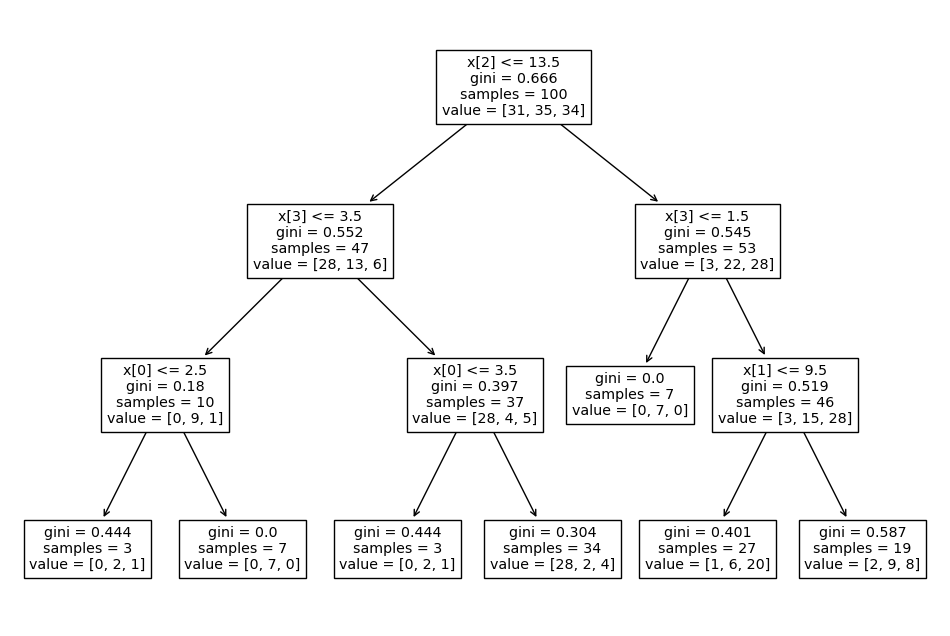

In [26]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

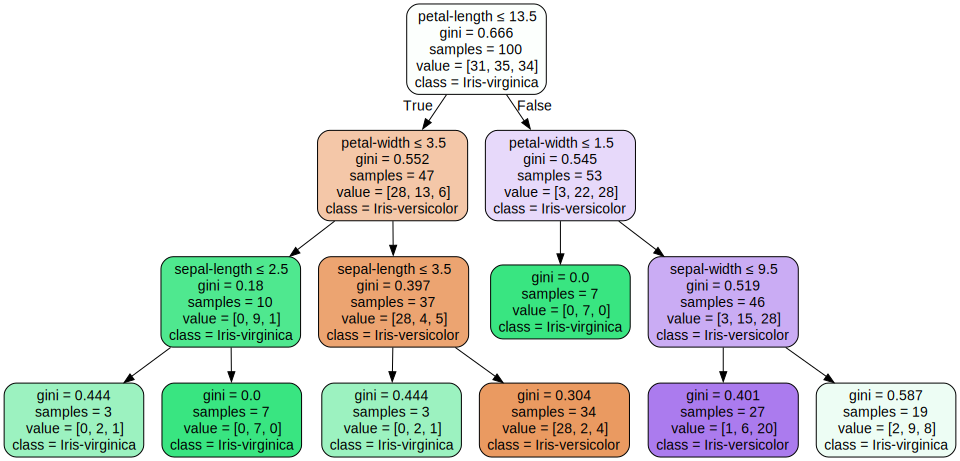

In [27]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph